<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
An introduction to neural network
</font>
</h1>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
In this exercise, we are going to implement the perceptron structure and its training algorithm. Coding at this level will help you gain a deeper understanding of how this model works in a practical way, and in the future, when faced with different neural network models, you will be able to analyze their structure more easily.
</font>
<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:orange"><b>notice:</b></span>
import necessary library
</font>
</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

<h2 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
data set
</font>
</h2>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
First, we generate a two-dimensional synthetic data set using the following function. This collection is a two-class dataset.
</font>

In [ ]:
def load_datasets():
    X1, y1 = sklearn.datasets.make_gaussian_quantiles(
      cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1)

    X2, y2 = sklearn.datasets.make_gaussian_quantiles(
      mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, -y2 + 1))

    return X , y


<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
The output of the <code>load_datasets</code> function includes <code>X</code> and <code>y</code>, where <code>X</code> is a NumPy array with 2 columns and 500 rows, and <code>y</code> is a vector of 500 elements containing 0s and 1s, representing the label of each point in <code>X</code>.

<h2 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
visulazition</font>
</h2>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Plot the dataset using the <code>matplotlib</code> library. Mark the points labeled 1 with blue color and the points labeled 0 with red color.
</font>


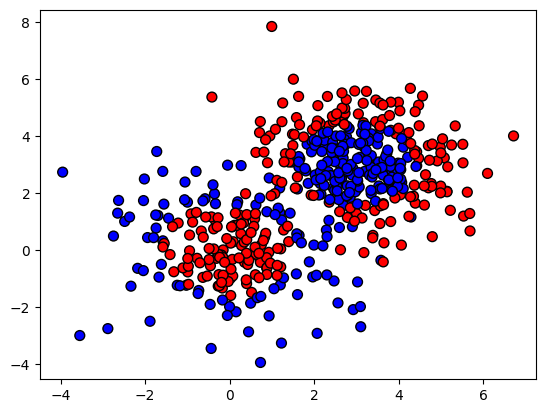

In [ ]:
X , y = load_datasets()

colors = ['red' if label==0 else 'blue' for label in y ]
plt.scatter(X[:, 0], X[:, 1], marker="o", c=colors, s=50, edgecolor="k")
plt.show()

<h2 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
base model
</font>
</h2>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>Before building a neural network, let's first see how the <code>LogisticRegressionCV</code> algorithm classifies these points. As we know, this model is a linear model.
</font>
<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
For this, take help from the <code>scikit-learn</code> library.</font>

In [ ]:
# TO-DO (Try LogisticRegressionCV)
clf = sklearn.linear_model.LogisticRegressionCV(random_state=42).fit(X, y)

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
The <code>plot_decision_boundary</code> function below helps you plot the model's classification boundary.
</font>


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 5))

    ax = plt.subplot(121)
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.Paired,
        response_method="predict",
        ax=ax,
        xlabel="x",
        ylabel="y")

    x_min, x_max = disp.xx0.min(), disp.xx0.max()
    y_min, y_max = disp.xx1.min(), disp.xx1.max()

    plt.axis("tight")

    for i, n, c in zip(range(2), "AB", "br"):
      idx = np.where(y == i)
      plt.scatter(
          X[idx, 0],
          X[idx, 1],
          c=c,
          cmap=plt.cm.Paired,
          s=20,
          edgecolor="k",
          label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc="upper right")
    plt.title("Decision Boundary")

<ipython-input-57-4dc01d689edf>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


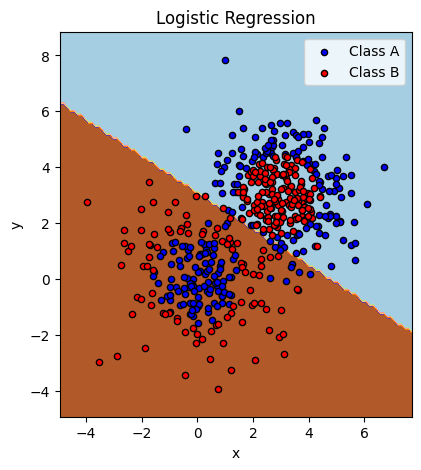

In [ ]:
plot_decision_boundary(clf, X, y)
plt.title("Logistic Regression");

<h2 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Simple neural network</font>
</h2>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
As can be seen in the previous section, this set of points is not such that we can separate them from each other with a linear model, as a result, Logistic Regression does not perform well. So, in the following, we will write a simple neural network and classify the data with it.
</font>
<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
We see an image of the model that we have to implement below.</font>
</p>

<center>
<img src="model_1.jpg">
</center>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
It is clear that the input of the model is binary (because its input is the coordinates of a point in two-dimensional space). For a two-layer neural network, we consider that the first layer contains 4 neurons and the second layer contains 1 neuron.
The activation function of the first layer is <code>tanh</code> and the activation function of the second layer is <code>sigmoid</code>.
The output of the model is also a number (value 0 or 1).
</font>

<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Setting general network specifications</font>
</h3>
<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
So, first, define variables and specify the number of inputs, the number of outputs and the number of neurons in the first layer.
</font>
</p>

In [ ]:
n_x = 2  #(Number of input)
n_h = 4  #(Number of neurons in hidden layer)
n_y = 1  #(Number of output neurons)


<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Initialization of parameters (weights)</font>
</h3>
<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Now complete the following function. This function receives the variables set in the cell above and sets the initial values of <code>W1</code>, <code>b1</code>, <code>W2</code> and <code>b2</code> to turns Randomly initialize the weights using the Gaussian distribution function (the variance of this distribution is <code>0.01</code>) and set the initial value of <code>b</code> to <code>0</code>.
</font>
</p>
<details dir="ltr" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="ltr" style="color:orange"><b>Guide: Function output dimensions</b></summary>
The output variables should have dimensions as follows:
<p  style="direction: rtl; text-align: center; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<code>
W1.shape = (4, 2)
</code>
<br>
<code>
b1.shape = (4, 1)
</code>
<br>
<code>
W2.shape = (1, 4)
</code>
<br>
<code>
b2.shape = (1, 1)
</code>
</font>
</details>

In [ ]:
def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.normal(size=(n_h, n_x) , scale=0.01)
    b1 = np.zeros((n_h, n_y))
    W2 = np.random.normal(size=(n_y, n_h) , scale=0.01)
    b2 = np.zeros((n_y,n_y))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = initialize_parameters(n_x, n_h, n_y)

# printing the parameters
for key, value in parameters.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

W1 (4, 2)
[[-0.01254179  0.0150867 ]
 [ 0.00242387  0.00286791]
 [-0.00374463 -0.03137306]
 [ 0.01793516 -0.00782365]]
------------------------------------------------------------
b1 (4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]
------------------------------------------------------------
W2 (1, 4)
[[-0.00262399 -0.00148931 -0.00837769  0.00855058]]
------------------------------------------------------------
b2 (1, 1)
[[0.]]
------------------------------------------------------------


<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc"> (Forward Propagation)
</font>
</h3>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Now we need to implement forward propagation in the <code>forward_propagation</code> function. For your convenience, the formulas are reproduced below. But you can also use the image of the model. Also, in order to have a cleaner code, it is better to implement the sigmoid function in a separate function.
</font>
<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Don't forget that the function should return other values in addition to <code>A2</code>. (we need these values in the <code>backward_propagation</code> phase)
</font>
</p>


$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$
$$ \sigma (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #(Sigmoid function)

'''
def tanh(z) :
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
'''
def tanh(z):
    return np.tanh(z)


In [ ]:
# make sure that the function works correctly: should output array([[0.5]])
sigmoid(np.array([[0.]]))

array([[0.5]])

In [ ]:
def linear_combination(W,x,b):
    return np.dot(W, x) + b

In [ ]:
def forward_propagation(X, parameters):

    Z1 = linear_combination(parameters['W1'], X.T , parameters['b1'] ) # (Compute Z1)
    A1 = tanh(Z1)  #(Compute A1)
    Z2 = linear_combination(parameters['W2'], A1 , parameters['b2'] )   #(Compute Z2)
    A2 = sigmoid(Z2) #(Compute A2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [ ]:
print(X.shape)
print(y.shape)

#X = X.transpose()
#print(X.shape)

(500, 2)
(500,)


In [ ]:
A2, cache = forward_propagation(X, parameters)

for key, value in cache.items():
    print(key, value.shape)

Z1 (4, 500)
A1 (4, 500)
Z2 (1, 500)
A2 (1, 500)


<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">  (Cost Function)
</font>
</h3>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>Now you need to implement the cost function. The desired cost function is the cross entropy function, which is formulated as follows.
</font>
</p>

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right)$$

In [ ]:
def compute_cost(A2, Y, parameters):
    m = len(Y)
    cost = np.sum( np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2)) ) * (-1/m)  #(Compute cross-entropy cost)
    return cost

In [ ]:
print("cost = " + str(compute_cost(A2, y, parameters)))

cost = 0.6931508139620629


In [ ]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[2, 0], [1, 3]])
np.dot(A, B)
np.multiply(A,B)


array([[ 2,  0],
       [ 3, 12]])

<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 (‌Backpropagation)
</font>
</h3>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Now you need to implement the backpropagation operation according to the gradients calculated in the <code>backward_propagation</code> function.
</font>
</p>

$$dz^{[2]} =  a^{[2]} - y$$
$$dW^{[2]} = dz^{[2]}a^{[1]^{T}}$$
$$db^{[2]} = dz^{[2]}$$
$$dz^{[1]} = W^{[2]^{T}}dz^{[2]}* g^{[1]'}(z^{[1]})$$
$$dW^{[1]} = dz^{[1]}X$$
$$db^{[1]} = dz^{[1]}$$

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    m = len(Y)
    dZ2 = cache['A2'] - Y
    dW2 = np.dot(dZ2 , cache['A1'].T)   #(Compute dW2)
    db2 = dZ2 #np.sum(dZ2, axis=1, keepdims=True) / m    #(Compute db2)
    dZ1 = np.dot(parameters['W2'].T, dZ2) * (1 - np.power(cache['A1'], 2))
    dW1 = np.dot(dZ1 , X)  #(Compute dW1)
    db1 = dZ1 #np.sum(dZ2, axis=1, keepdims=True) / m   #(Compute db1)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [ ]:
grads = backward_propagation(parameters, cache, X, y)

for key, value in grads.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

dW1 (4, 2)
[[-0.01201601 -0.01769569]
 [-0.00702425 -0.01039025]
 [-0.03165326 -0.04111504]
 [ 0.03732817  0.05876589]]
------------------------------------------------------------
db1 (4, 500)
[[-0.00131187  0.0013015   0.00131064 ... -0.00131081 -0.0013095
  -0.00131029]
 [-0.0007447   0.00074481  0.00074474 ... -0.00074481 -0.00074481
  -0.00074494]
 [-0.00418897  0.00416859  0.00417064 ... -0.00414887 -0.00412589
  -0.00417478]
 [ 0.00427463 -0.00423999 -0.00427428 ...  0.00427642  0.00427596
   0.00424906]]
------------------------------------------------------------
dW2 (1, 4)
[[ 0.04559893  0.03154482 -0.21420733  0.02833268]]
------------------------------------------------------------
db2 (1, 500)
[[ 0.50002808 -0.50010671 -0.5000738  -0.50012522 -0.49993333 -0.49996112
  -0.49992533  0.50002122 -0.49993635 -0.50011299  0.50000824 -0.49992297
  -0.50007508  0.50004747 -0.49997336 -0.50004393 -0.49999995 -0.50010151
  -0.49996572 -0.50002173 -0.50003459  0.50001595 -0.49993014 


<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Update parameters (weights)</font>
</h3>


<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
After calculating the gradients, we can update the network parameters. For this, implement the <code>update_parameters</code> function according to the formulas below.
</font>
</p>

$$W^{[1]} = W^{[1]} - learningRate * dW^{[1]}$$
$$b^{[1]} = b^{[1]} - learningRate * db^{[1]}$$
$$W^{[2]} = W^{[2]} - learningRate * dW^{[2]}$$
$$b^{[2]} = b^{[2]} - learningRate * db^{[2]}$$


In [ ]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters['W1'] -  (learning_rate * grads['dW1']) #(Update W1)
    b1 = parameters['b1'] -  (learning_rate * grads['db1']) #(Update b1)
    W2 = parameters['W2'] -  (learning_rate * grads['dW2']) #(Update W2)
    b2 = parameters['b2'] -  (learning_rate * grads['db2']) #(Update b2)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = update_parameters(parameters, grads, 1.2)

for key, value in parameters.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

W1 (4, 2)
[[ 0.00187742  0.03632153]
 [ 0.01085297  0.0153362 ]
 [ 0.03423929  0.01796499]
 [-0.02685865 -0.07834272]]
------------------------------------------------------------
b1 (4, 500)
[[ 0.00157424 -0.0015618  -0.00157276 ...  0.00157297  0.0015714
   0.00157235]
 [ 0.00089364 -0.00089377 -0.00089369 ...  0.00089377  0.00089377
   0.00089393]
 [ 0.00502676 -0.0050023  -0.00500477 ...  0.00497865  0.00495107
   0.00500973]
 [-0.00512956  0.00508799  0.00512914 ... -0.0051317  -0.00513115
  -0.00509887]]
------------------------------------------------------------
W2 (1, 4)
[[-0.05734271 -0.03934309  0.24867111 -0.02544863]]
------------------------------------------------------------
b2 (1, 500)
[[-0.60003369  0.60012805  0.60008856  0.60015027  0.59991999  0.59995334
   0.5999104  -0.60002547  0.59992363  0.60013558 -0.60000989  0.59990756
   0.60009009 -0.60005696  0.59996803  0.60005271  0.59999994  0.60012181
   0.59995887  0.60002608  0.6000415  -0.60001914  0.59991617 -0.6

<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
شبکه‌ی عصبی نهایی و حلقه‌ی آموزش
</font>
</h3>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Now that you have implemented all the required components of your neural network, you can put them together in a general function and build the training loop. Implement your neural network model using the functions from the previous sections in the <code>nn_model</code> function.
</font>
</p>
<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
The process of this function should be as follows:
<ul dir=ltr >
<li dir=ltr style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Call the initialization function to initialize <code>W1</code>, <code>b1</code>, <code>W2</code> and <code>b2</code>.
</li>
<li dir=ltr style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Repeat the following steps in a loop as many <code>num_iterations</code> times:
</li>
<li dir=ltr style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Forward propagation should be done with the <code>forward_propagation</code> function.
</li>
<li dir=ltr style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Calculate the value of the cost function.</li>
<li dir=ltr style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
The value of the gradient should be calculated with the help of the backward propagation function.
</li>
<li dir=ltr style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Update the parameters using the <code>update_parameters</code> function.
</li>
</ul>
</font>
</p>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
It is suggested to output the cost after a number of rounds (for example, 1000 rounds).
</font>
</p>

In [ ]:
def nn_model(X, Y, learning_rate, num_iterations = 10000):

    # Set the network details like the number of input, hidden and output neurons
    n_x = 2  #(Number of input)
    n_h = 4  #(Number of neurons in hidden layer)
    n_y = 1  #(Number of output neurons)


    # Initialize parameters
    parameters = initialize_parameters(n_x , n_h , n_y)


    # Loop (gradient descent)
    for i in range (num_iterations):

        # Forward propagation
        A2 , cache = forward_propagation(X , parameters)

        # Compute cost
        cost = compute_cost(A2, Y , parameters)

        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # Update parameters (using gradient descent)
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 1000 iterations
        if i % 1000 ==0 :
            print(f'cost in iteration {i} : {cost}')


    return parameters , A2

<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
predict
</font>
</h3>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Finally, we must implement the <code>predict</code> function. This function predicts the output of the network as follows:
</font>
</p>

$$ y^{(i)}_{prediction} = \begin{cases} 1 & \text{if } a^{[2](i)} > 0.5 \\ 0 & \text{otherwise } \end{cases} $$

In [ ]:
def predict(parameters, X):
    X = X.T if X.shape[0] != 2 else X
    A2, cache = forward_propagation(X, parameters) #A2 shape is (1,500)
    predictions = (A2 > 0.5).astype(int)
    return predictions


<h3 dir=ltr align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
experiment
</font>
</h3>

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Now train the model <code>150000</code> times with a learning rate of <code>0.1</code> with the code below.
</font>

In [ ]:
#y = y.reshape((y.shape[0] , 1))
print(X.shape)
print(y.shape)
print(A2.shape)

(500, 2)
(500,)
(1, 500)


In [ ]:
parameters , AA2 = nn_model(X, y, learning_rate = 0.1 , num_iterations = 150000)

cost in iteration 0 : 0.6931470339876199


<ipython-input-68-3e086708cece>:3: RuntimeWarning: divide by zero encountered in log
  cost = np.sum( np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2)) ) * (-1/m)  #(Compute cross-entropy cost)
<ipython-input-68-3e086708cece>:3: RuntimeWarning: invalid value encountered in multiply
  cost = np.sum( np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2)) ) * (-1/m)  #(Compute cross-entropy cost)


cost in iteration 1000 : 0.0002742870250351236
cost in iteration 2000 : 0.00026494892003920496
cost in iteration 3000 : 0.0002565357739292935
cost in iteration 4000 : 0.0002487223084388415
cost in iteration 5000 : 0.00024141935045373904
cost in iteration 6000 : 0.00023456713735345514
cost in iteration 7000 : 0.00022811952455351227
cost in iteration 8000 : 0.00022203827670458723
cost in iteration 9000 : 0.00021629062374712633
cost in iteration 10000 : 0.00021084801254775718
cost in iteration 11000 : 0.00020568532572549315
cost in iteration 12000 : 0.00020078031872821698
cost in iteration 13000 : 0.00019611318349796732
cost in iteration 14000 : 0.00019166619789762234
cost in iteration 15000 : 0.00018742343825901996
cost in iteration 16000 : 0.0001833705402733846
cost in iteration 17000 : 0.00017949449755989835
cost in iteration 18000 : 0.0001757834896522545
cost in iteration 19000 : 0.00017222673249220585
cost in iteration 20000 : 0.00016881434492934923
cost in iteration 21000 : 0.000165

<p dir=ltr style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
Now again draw the classification range of the neural network model and see the differences and learning accuracy of the neural network model.
</font>

In [ ]:
def plot_decision_boundary_for_nn(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [ ]:
plot_decision_boundary_for_nn(lambda x: predict(parameters, x), X.T, y.T)
plt.title("Decision Boundary for NN ");

ValueError: shapes (4,2) and (1747193,2) not aligned: 2 (dim 1) != 1747193 (dim 0)